## Desafío - Tabaquismo y gestación - Maria Laura Oyarce

#### Un grupo de investigadores está interesado en analizar la relación entre el hábito de fumar con el crecimiento de los bebés en edad gestacional. A partir de estos datos se solicita:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
#Cargamos los datos y revisamos las primeras columnas
data=pd.read_csv('baby.csv')
data.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [3]:
#Información del nombre y tipo de cada columna
display(data.info())
#Información estadistica de cada columna
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


None

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


Por lo que se puede ver a partir de la info extraída, es que no hay columnas con valores nan, todas las columnas son reconocidad por python como números, exceptuando la última que es booleana (true o false). Las desviaciones estandar son relativamente bajas, por lo que tampoco existen valores extremos. Por lo tanto esta todo ok para proceder con el análisis.

2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

In [4]:
#Definiremos una función que nos permita modelar un conjunto de datos con distribución normal
def get_pdf(x):
    mean=x.mean()
    std=x.std()
    min=x.min()
    max=x.max()
    x = np.linspace(min, max)
    #Calculamos el valor de la función de distribución de probabilidad normal (pdf)
    pdf = sp.stats.norm.pdf(x, loc=mean, scale=std)
    return(x,pdf)

In [5]:
#Extraemos la columna peso de bebé
baby_weight=data['Birth.Weight']
x,pdf = get_pdf(baby_weight)

Text(0.5, 1.0, 'Distribución del peso de los bebés')

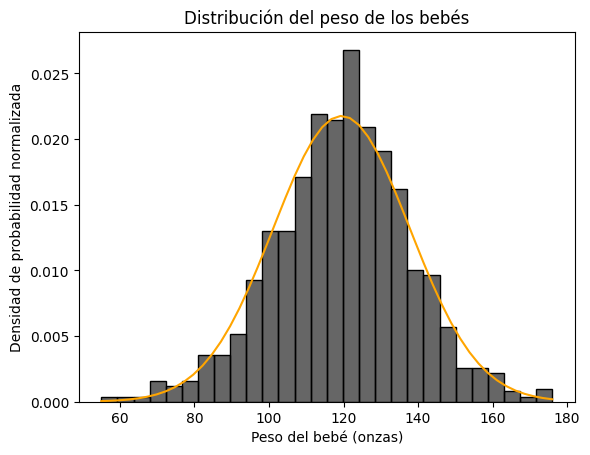

In [6]:
#Ploteamos el histograma de los datos y la pdf, para ver el comportamiento de los datos
sns.histplot(baby_weight, stat='density',color='k',alpha=0.6)
plt.plot(x, pdf, color='orange', label='PDF')
plt.xlabel('Peso del bebé (onzas)')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribución del peso de los bebés')

Como podemos ver, la pdf coincide con la distribución de los datos de pesó de bebé, por lo tanto podemos concluir que los datos si siguen una distribución normal.

3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

In [7]:
#Primero creamos la lista con los 5 valores de prueba
test_values=np.linspace(baby_weight.min(),baby_weight.max(),5)

Para ver si los datos se ajustan a una distribución normal compararemos percentiles. Para esto, utilizaremos la funcion percentileofscore de scipy para calcular los percentiles reales y la función de distribución acumulativa (CDF) para calcular los percentiles teóricos.

La CDF te dice la probabilidad de que una variable aleatoria tome un valor menor o igual a un valor específico.

Si el percentil real y teórico tienen valores similares, sugerirán un buen ajuste al modelo normal. Por otro lado, si son muy diferentes, se podrá concluir que los datos no se ajustan correctamente a una distribución normal.

In [8]:
#Recorremos los valores de prubea
for value in test_values:
    #Calculamos percentil real
    real_per=round(sp.stats.percentileofscore(baby_weight,value),2)
    #Calculamos percentil teórico. 
    #Esta funcion entrega valores entre 0 y 1 por lo que multiplicaremos por 100 para comparar
    theo_per=round(100*sp.stats.norm.cdf(value,loc=baby_weight.mean(),scale=baby_weight.std()),2)

    print ('El percentil real para  '+str(value)+' oz es '+str(real_per)+' y el teórico es '+str(theo_per))

El percentil real para  55.0 oz es 0.09 y el teórico es 0.02
El percentil real para  85.25 oz es 3.92 y el teórico es 3.1
El percentil real para  115.5 oz es 39.78 y el teórico es 41.44
El percentil real para  145.75 oz es 93.44 y el teórico es 92.42
El percentil real para  176.0 oz es 100.0 y el teórico es 99.9


Ya que los valores de los percentiles teoricos y reales son similares, podemos concluir que los datos se ajustan correctamente a una distribución normal.

4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

In [9]:
#Separamos los datos de peso entre madres fumadoras y no fumadoras
smokers= data[data['Maternal.Smoker']==True]['Birth.Weight']
non_smokers= data[data['Maternal.Smoker']==False]['Birth.Weight']

Promedio de peso del bebé en mamás fumadoras:  113.82 oz
Promedio de peso del bebé en mamás no fumadoras:  123.09 oz


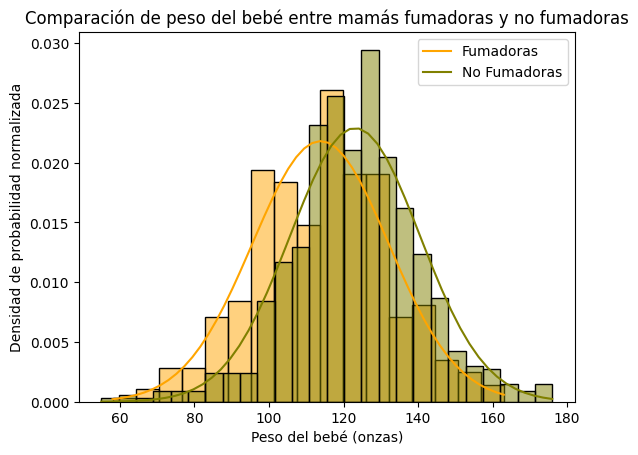

In [10]:
#Calculamos las pdf de ambos grupos de madres
x_s,pdf_s=get_pdf(smokers)
x_ns,pdf_ns=get_pdf(non_smokers)
print ('Promedio de peso del bebé en mamás fumadoras: ',round(smokers.mean(),2),'oz')
print ('Promedio de peso del bebé en mamás no fumadoras: ',round(non_smokers.mean(),2),'oz')

#Ploteamos los histogramas para comparar ambos grupos de estudio
sns.histplot(smokers, stat='density', alpha=0.5, color='orange')
plt.plot(x_s , pdf_s, color='orange', label='Fumadoras')
sns.histplot(non_smokers, stat='density',alpha=0.5,color='olive')
plt.plot(x_ns , pdf_ns, color='olive', label='No Fumadoras')
plt.xlabel('Peso del bebé (onzas)')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Comparación de peso del bebé entre mamás fumadoras y no fumadoras')
plt.legend()

Del gráfico se observa que la distribución de pesos de los bebés cuyas madres son fumadoras tiende a estar desplazada hacia la izquierda (menor peso) en comparación con la de los bebés de madres no fumadoras (mayor peso). Esto indica que los bebés de madres fumadoras tienen, en promedio, un menor peso al nacer. Por lo tanto el gráfico respalda la hipótesis de que el tabaquismo materno se asocia con un menor peso al nacer.

5. Considerando los datos dados:

● Calcula la probabilidad de que una madre escogida al azar fume.

In [11]:
smok_prob = data['Maternal.Smoker'].mean()
print ('La probabilidad de elegir al azar una madre fumadora es de',round(smok_prob,2))

La probabilidad de elegir al azar una madre fumadora es de 0.39


Dado que la columna Maternal.Smoker contiene valores booleanos podemos interpretar estos valores como 1 (True) y 0 (False). En este caso, el promedio de esta columna nos da la proporción de valores 'True', es decir, la fracción de madres que son fumadoras en la muestra. Dado que el promedio de una variable binaria (0 y 1) es equivalente a la proporción de unos en la muestra, podemos usarlo directamente como una probabilidad.

● A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar
cuántas fuman.

In [12]:
n_madres=5
#Calculamos el modelo binomial con la funcion del paquete scipy
binomial_model= sp.stats.binom(n_madres, smok_prob)

● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales.


In [13]:
#Calculamos las medias muestrales de la distribucion binomial
n_sim=1000
medias_binom=[]
for i in range(n_sim):
    medias_binom.append(np.mean(np.random.binomial(n_madres, smok_prob, size=8)))

● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.


In [14]:
smoke=data['Maternal.Smoker'].astype(int)
#Calculamos las medias muestrales de la distribucion de los datos reales
medias_reales=[]
for i in range(n_sim):
    muestra=[]
    for j in range(8):
        muestra.append(np.sum(np.random.choice(smoke, size=5, replace=False)))
    medias_reales.append(np.mean(muestra))

Utilizando lo anterior:
● Compara gráficamente los resultados obtenidos anteriormente.

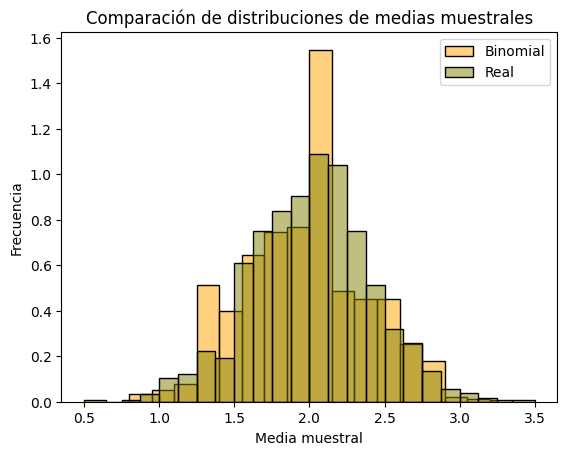

In [15]:
#Ploteamos los histogramas de ambas medias para poder comparar
sns.histplot(medias_binom,bins=20,stat='density',alpha=0.5, color='orange',label='Binomial')
sns.histplot(medias_reales,bins=20,stat='density',alpha=0.5, color='olive',label='Real')
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.title('Comparación de distribuciones de medias muestrales')
plt.legend()

Del gráfico se aprecia que las simulaciones basadas en una distribución binomial son practicamente iguales a la distribución real de los datos.

● Verifica el teorema del límite central, considerando las muestras de datos reales y las simuladas con el modelo binomial.

● Construye un modelo de distribución normal derivado del modelo binomial, y grafícalo junto a los anteriores para comparar. Concluye.

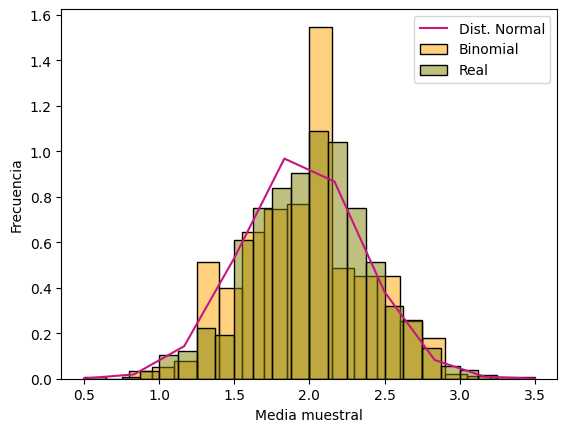

In [16]:
#Calculamos las propiedades estadisticas para poder calcular la pdf final
mean_real=np.mean(medias_reales)
std_real=np.std(medias_reales)
min_binom=np.min(medias_binom)
max_binom=np.max(medias_binom)
x_binom = np.linspace(min_binom, max_binom,num=10)

#Generamos la pdf final
pdf_final = sp.stats.norm.pdf(x_binom, loc=mean_real, scale=std_real)

#Ploteamos los histogramas y la pdf para poder comparar y sacar conclusiones del estudio
sns.histplot(medias_binom,bins=20,stat='density',alpha=0.5,color='orange',label='Binomial')
sns.histplot(medias_reales,bins=20,stat='density',alpha=0.5,color='olive',label='Real')
plt.plot(x_binom, pdf_final, color='mediumvioletred', label='Dist. Normal')
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.legend()

Del gráfico se puede concluir que tanto la distribución de medias obtenidas a partir de la simulación binomial como la distribución de medias reales presentan una forma aproximadamente normal. Esto indica que, independientemente del método de muestreo, las medias siguen una distribución cercana a la normal.

Por otro lado, la superposición de la curva de distribución normal sobre ambas distribuciones sugiere que el teorema del límite central se cumple. Es decir, a medida que el tamaño de la muestra aumenta, la distribución de las medias muestrales tiende a una distribución normal, incluso cuando los datos originales provienen de una distribución binomial.